We have Taken the "Indian Stock Market" dataset, which is from the Annexure list. The link is : https://www.kaggle.com/rohanrao/nifty50-stock-market-data.

In [ ]:
!pip install pandas==1.0.5 matplotlib==3.2.2 seaborn==0.12.2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:


df = pd.read_csv('NIFTY50_all.csv')

print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])


Number of rows: 235192
Number of columns: 15


### Checking each columns data types

In [ ]:
dtype_df = pd.DataFrame(df.dtypes.reset_index())
dtype_df.columns =  ["column_names", "data_type"]
dtype_df

,column_names,data_type
0,Date,object
1,Symbol,object
2,Series,object
3,Prev Close,float64
4,Open,float64
5,High,float64
6,Low,float64
7,Last,float64
8,Close,float64
9,VWAP,float64


In [ ]:
null_df = df.isnull().sum().to_frame().reset_index()
null_df.columns = ["column_name", "number_of_nulls"]
null_df

,column_name,number_of_nulls
0,Date,0
1,Symbol,0
2,Series,0
3,Prev Close,0
4,Open,0
5,High,0
6,Low,0
7,Last,0
8,Close,0
9,VWAP,0


### Dropping null rows as we need all columns for analysis

In [ ]:
df.dropna(inplace=True)

### Dropping duplicates rows

In [ ]:
print("Number of duplicate rows:- ",df.duplicated().sum())
df.drop_duplicates(inplace=True)

Number of duplicate rows:-  0


### Describtion of the preprocessed Dataframe

In [ ]:
pd.DataFrame(df.describe())#.round(7)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,120344.000000,120344.000000,120344.000000,120344.000000,120344.000000,120344.000000,120344.000000,1.203440e+05,1.203440e+05,1.203440e+05,1.203440e+05,120344.000000
mean,1790.535401,1792.524259,1816.044640,1767.288552,1790.881606,1791.158651,1791.722361,4.625300e+06,2.437415e+14,6.196427e+04,1.887064e+06,0.496880
std,3438.420389,3443.732268,3489.044053,3392.794525,3438.621760,3439.663324,3440.298928,9.436198e+06,4.221423e+14,6.866457e+04,3.468739e+06,0.178501
min,60.000000,59.400000,62.900000,50.000000,60.200000,60.000000,60.840000,3.200000e+01,8.871925e+09,1.100000e+01,5.000000e+00,0.029900
25%,333.300000,333.750000,338.500000,328.250000,333.250000,333.300000,333.420000,6.332805e+05,5.811965e+13,2.183400e+04,2.708742e+05,0.365400
50%,711.250000,712.000000,721.825000,702.000000,711.200000,711.425000,711.770000,1.848152e+06,1.298208e+14,4.406800e+04,8.964180e+05,0.508200
75%,1778.500000,1780.012500,1803.412500,1756.062500,1778.000000,1779.062500,1779.372500,4.846378e+06,2.769665e+14,7.893550e+04,2.232892e+06,0.629700
max,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,32975.240000,3.905778e+08,3.564334e+16,1.643015e+06,2.325307e+08,0.999200


### Distribution of Close Prices

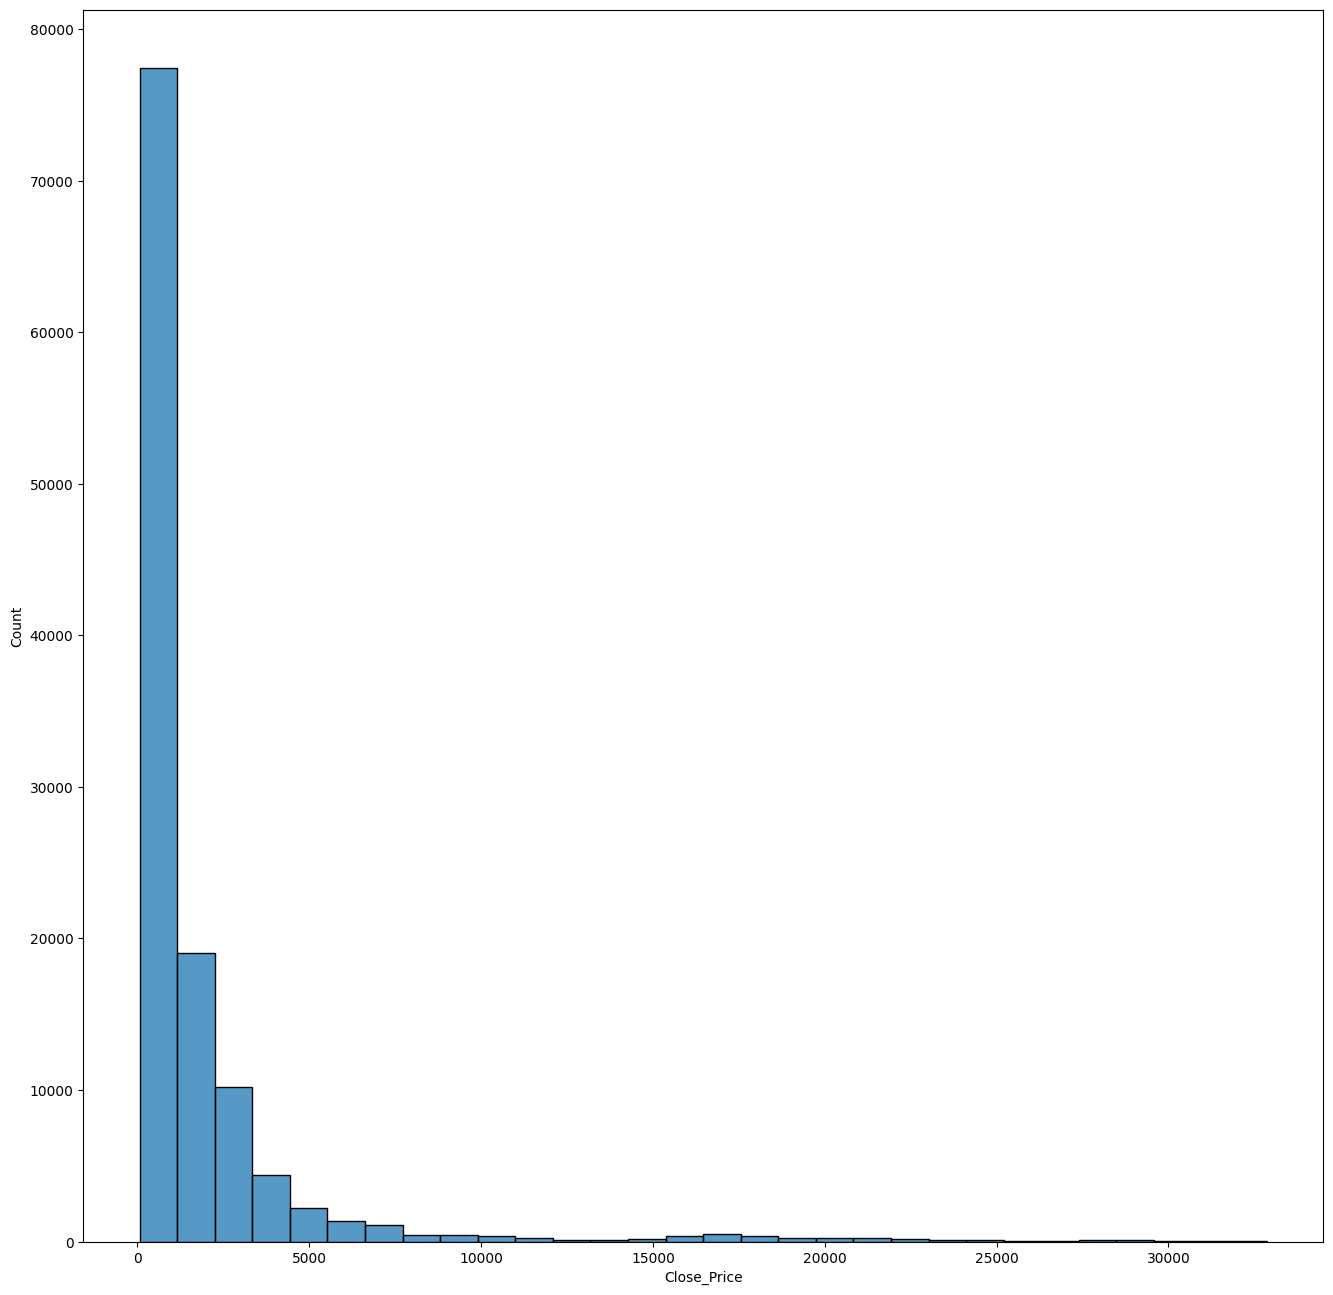

In [ ]:
plt.figure(figsize=(16, 16))
sns.histplot(df['Close'], bins=30)
plt.xlabel('Close_Price')
plt.ylabel('Count')
plt.show()

### Close Prices over Time plot

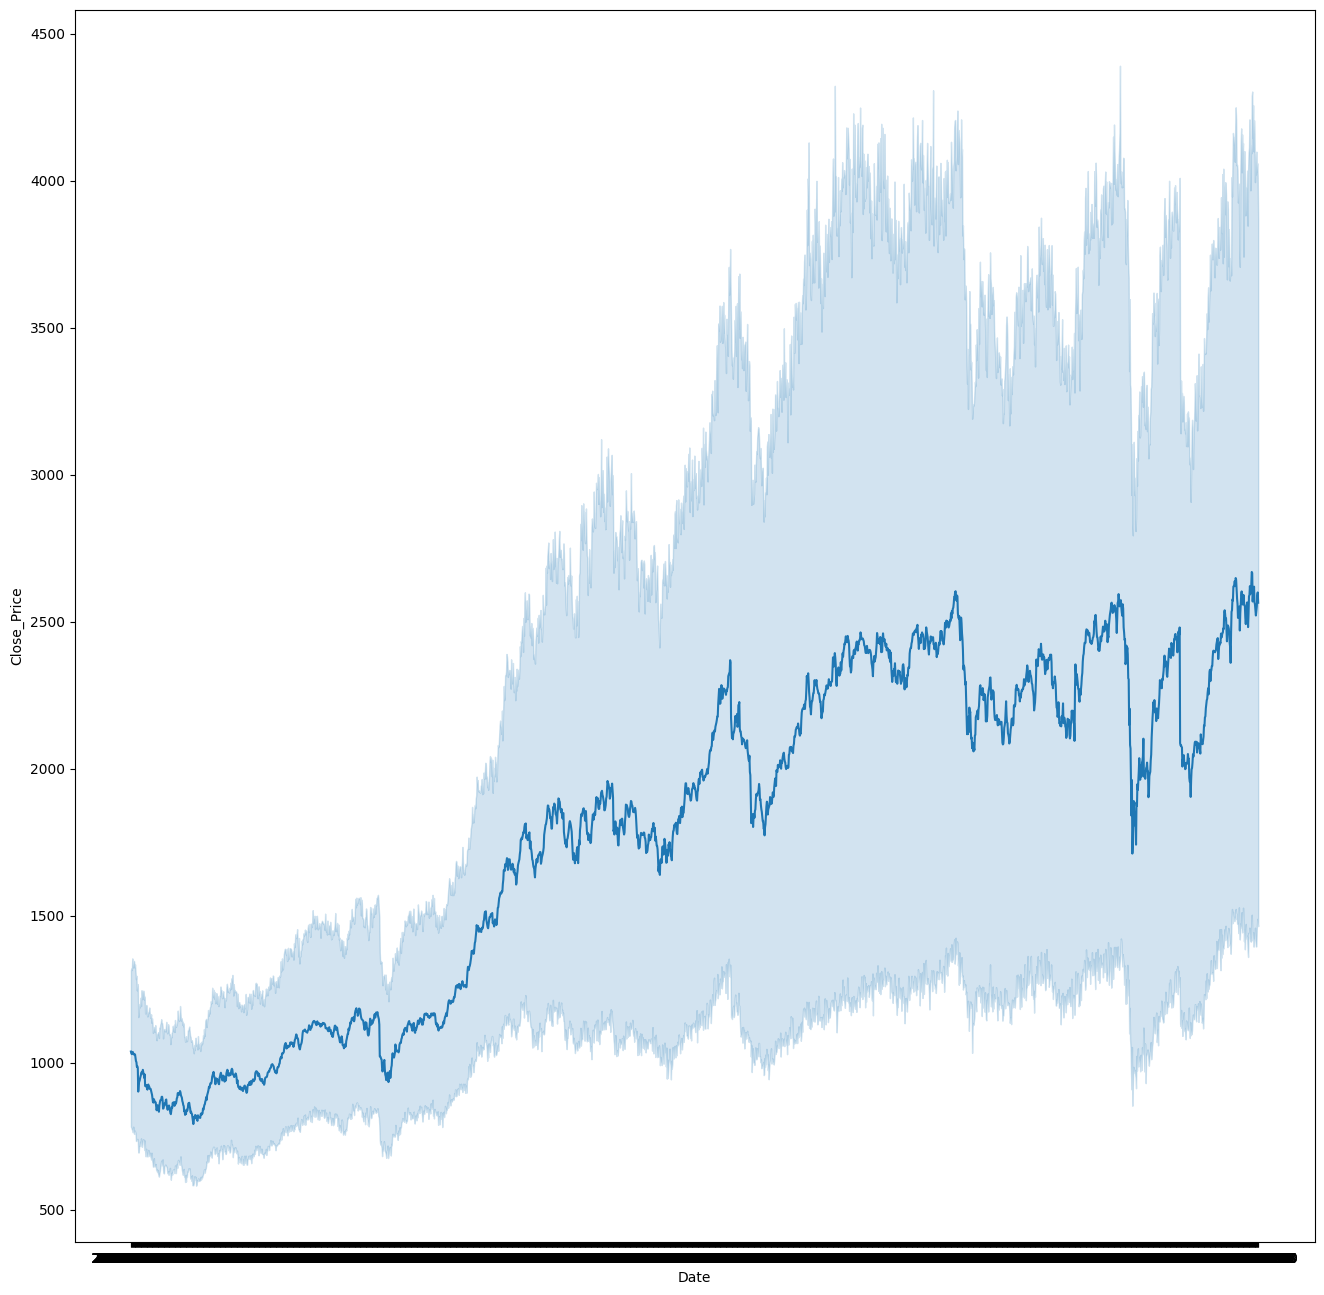

In [ ]:
plt.figure(figsize=(16, 16))
sns.lineplot(x=df.Date, y=df.Close)
plt.xlabel('Date')
plt.ylabel('Close_Price')
plt.show()

### correlation heatmap plot

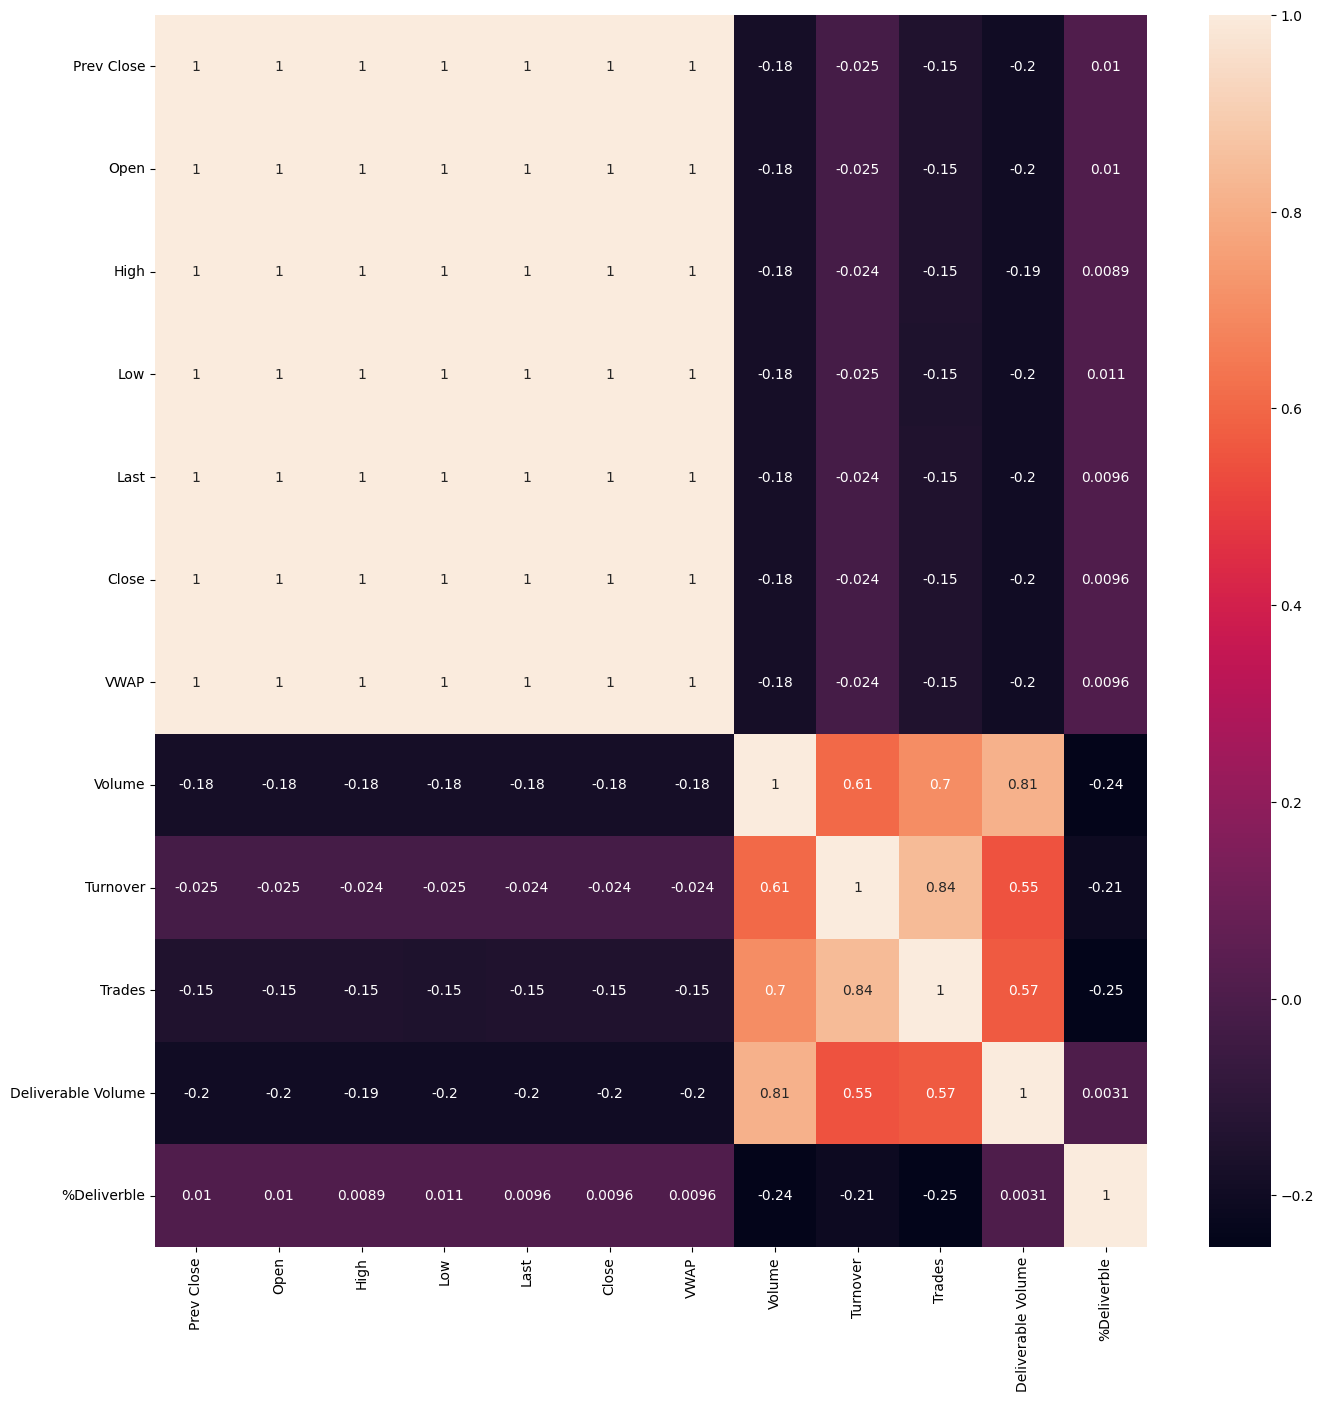

In [ ]:
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Questions & Explanation

# Close prices for Reliance shares over time can be used to spot price trends, which can help traders make more informed trading decisions. A good time to buy, for instance, might be if the price is steadily rising over time, whereas a good time to sell might be if the price is steadily falling over time.

### Reliance share Close price overtime

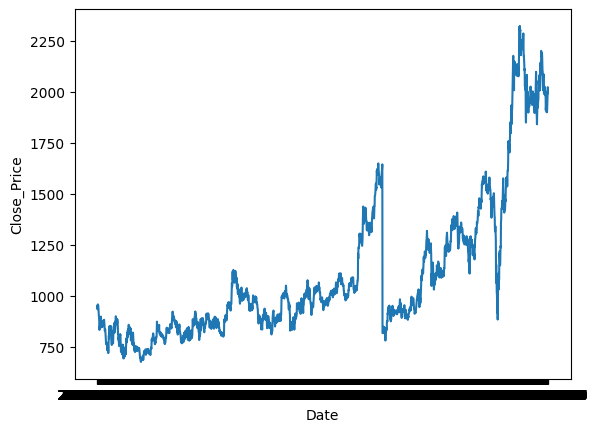

In [ ]:
reliance_df = df[df.Symbol == "RELIANCE"]
plt.Figure(figsize=(16, 16))
sns.lineplot(x=reliance_df.Date, y=reliance_df.Close, data=reliance_df)
plt.xlabel('Date')
plt.ylabel('Close_Price')
plt.show()

Output:

Explanation:

The code filters the original dataset for Reliance shares by selecting only the rows where the 'Symbol' column is equal to 'RELIANCE'. It then creates a line chart of the 'Close' prices for these shares over time using the seaborn package. The resulting plot shows that the price of Reliance shares has generally been increasing over the past year, with a few brief periods of decline.

## Distribution of Close Prices for Reliance Shares

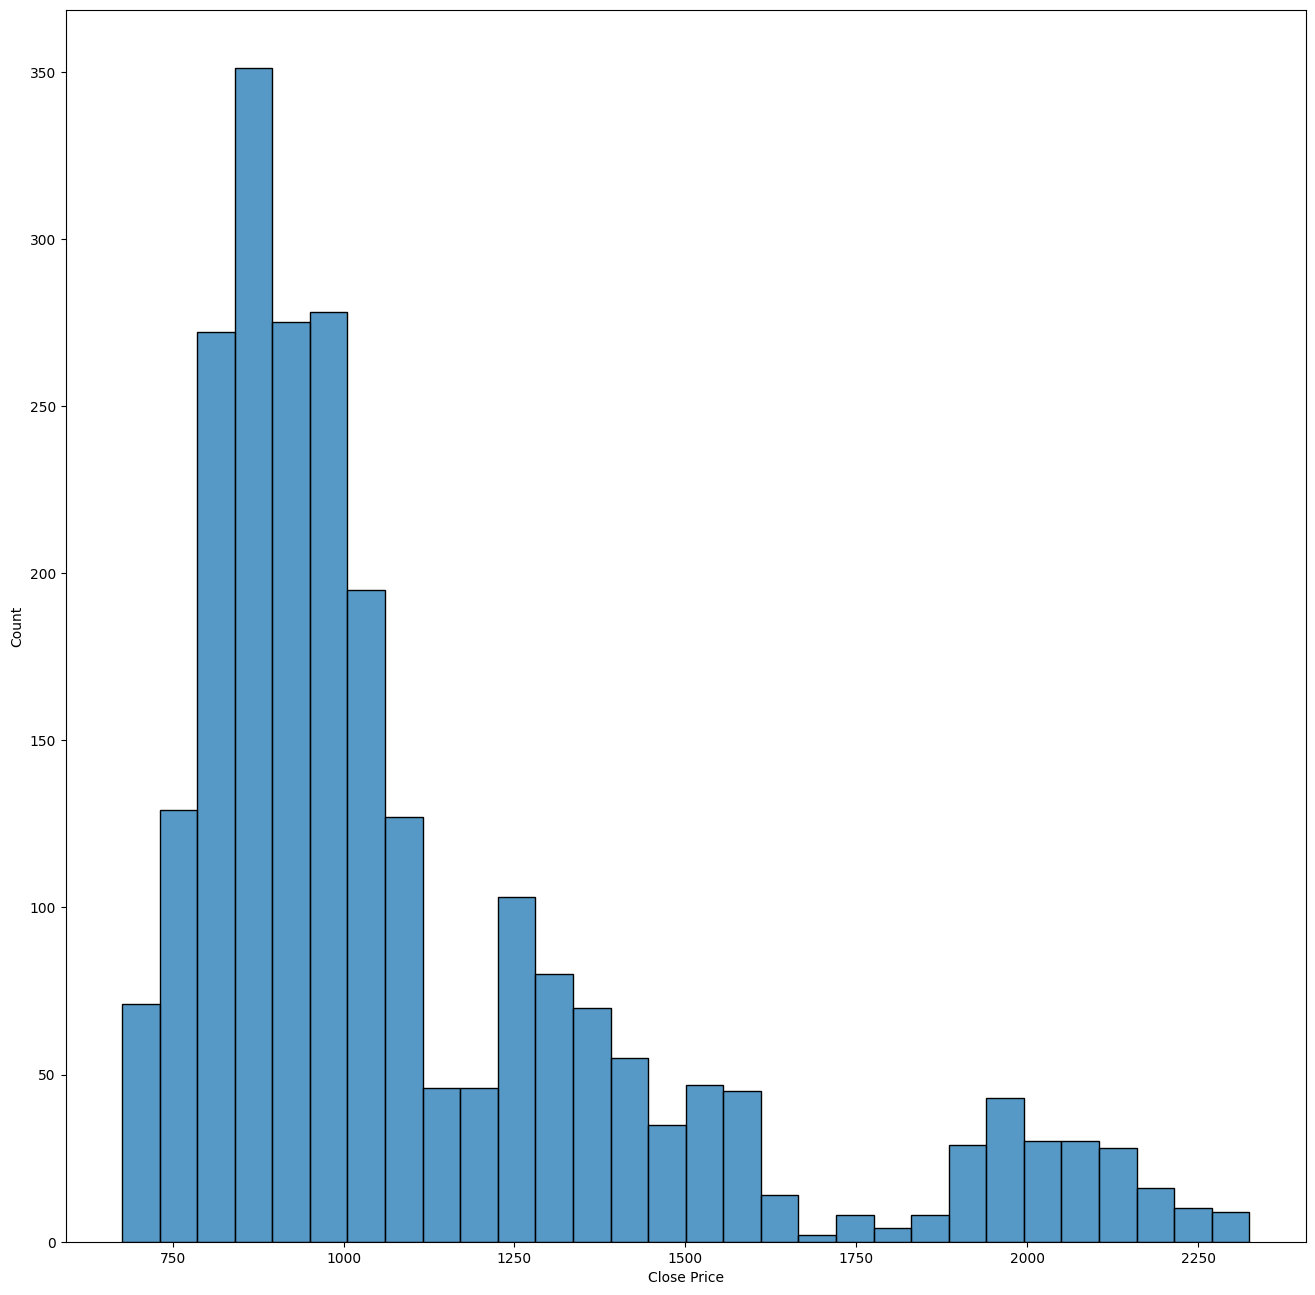

In [ ]:

plt.figure(figsize=(16, 16))
sns.histplot(reliance_df.Close, bins=30)
plt.xlabel('Close Price')
plt.show()

Output:

Explanation:
The resulting plot shows that the majority of Reliance share prices fall in the range of approximately 750-2250, with a few extreme values above and below this range.

# A correlation heatmap for Reliance shares can help identify relationships between Reliance shares and other variables that may affect their price. For example, if there is a strong positive correlation between Reliance shares and the overall stock market, this may indicate that the price of Reliance shares is heavily influenced by market trends.

## Correlation Heatmap for Reliance Shares

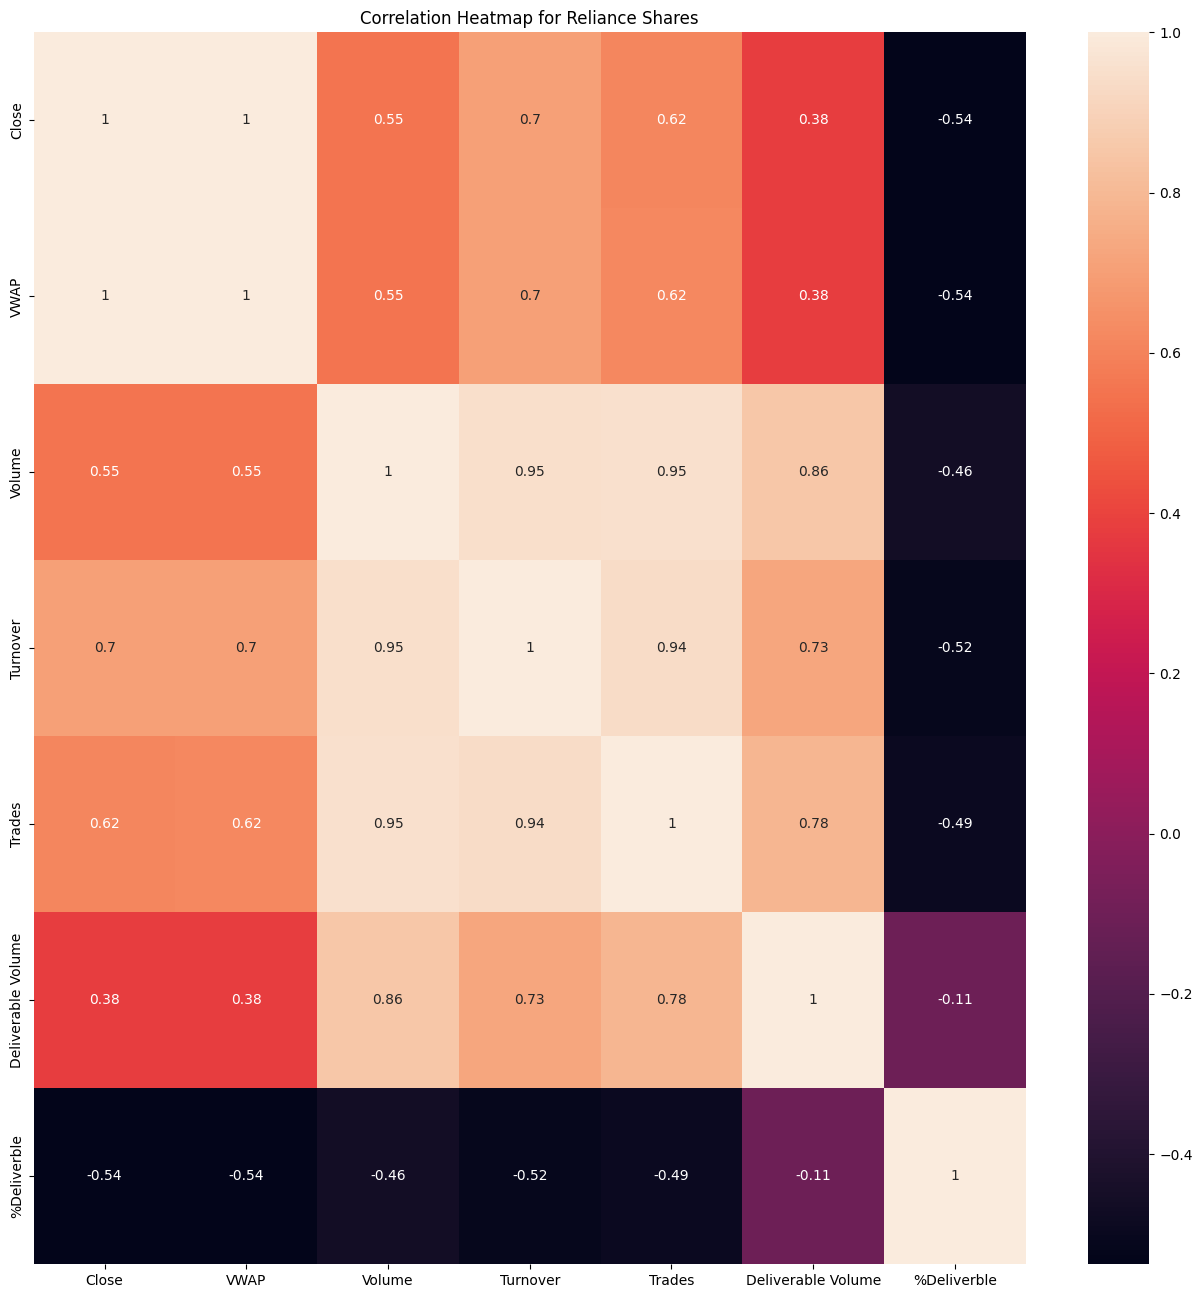

In [ ]:
reliance_df_temp = reliance_df[['Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume','%Deliverble']]
corr_matrix = reliance_df_temp.corr()

plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap for Reliance Shares')
plt.show()

Output:

Explanation:
By computing the heatmap for reliance share we can see a  strong positive corealation between the overall stock market.

## Calculate the average daily return and moving average for Reliance shares

<ipython-input-19-f131d4c8701b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reliance_df['Daily_Return'] = reliance_df.Close.pct_change()


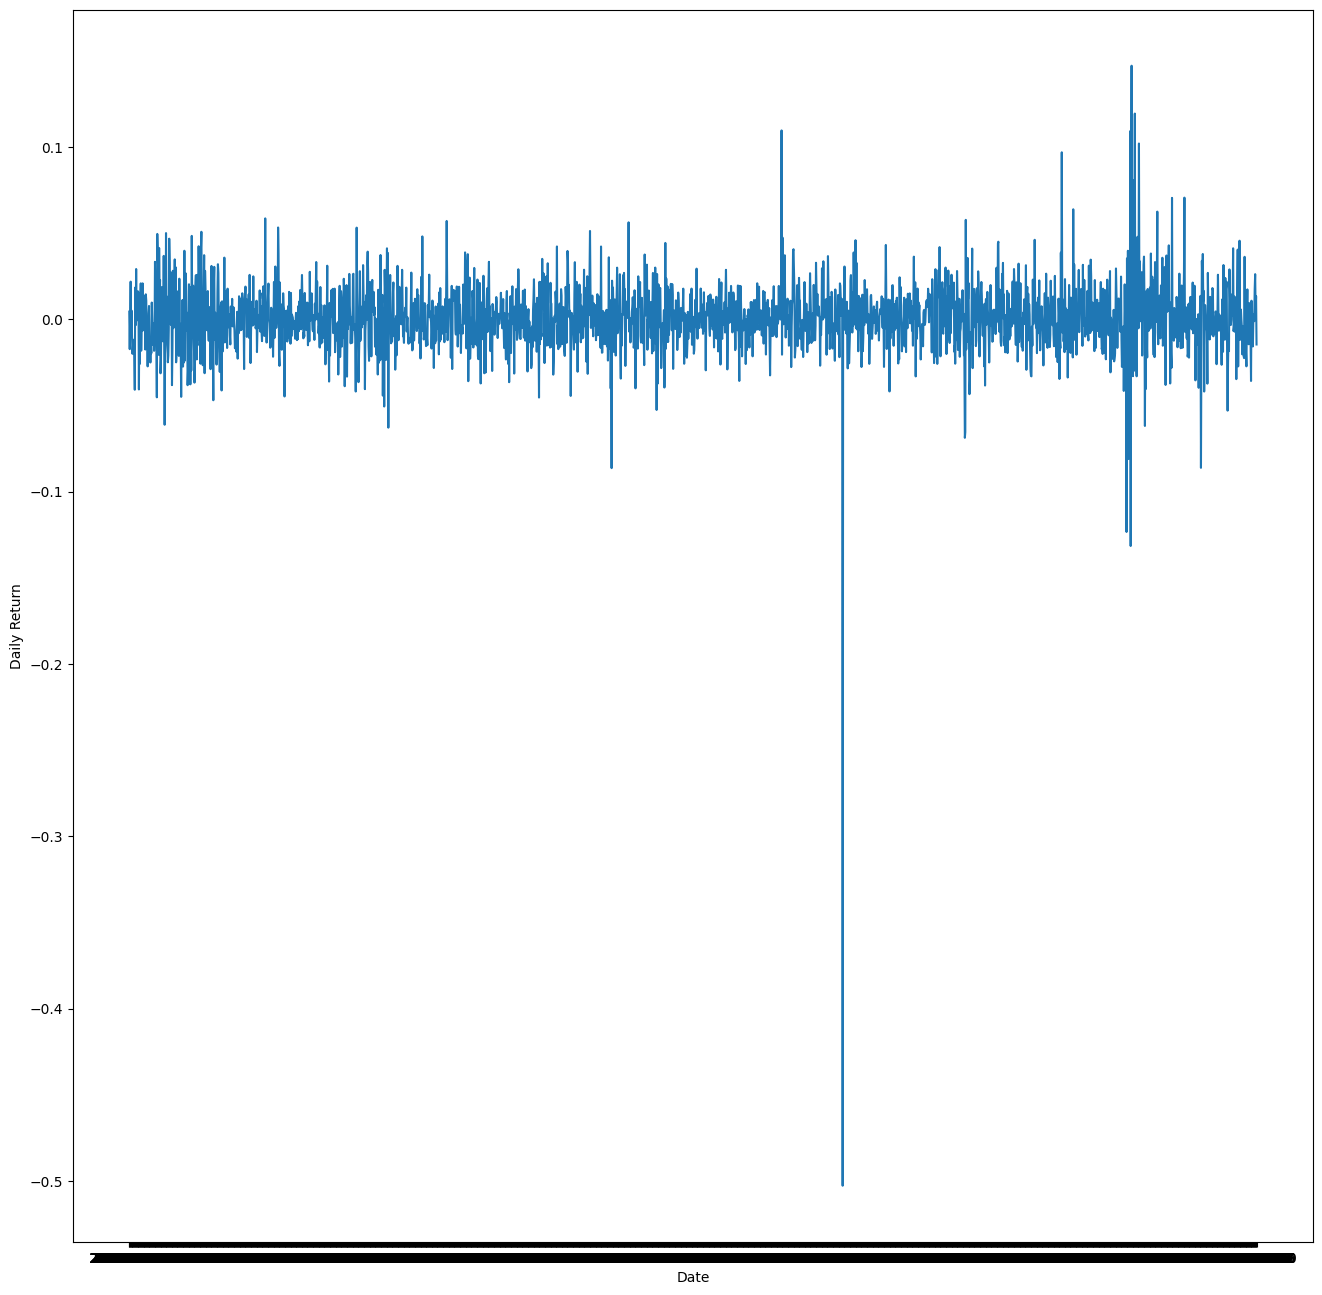

In [ ]:

reliance_df['Daily_Return'] = reliance_df.Close.pct_change()

plt.figure(figsize=(16, 16))
plt.plot(reliance_df.Date, reliance_df.Daily_Return)
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()

In [ ]:
# 30-day moving average
reliance_df['MA30'] = reliance_df.Close.rolling(window=30).mean()

# 100-day moving average
reliance_df['MA100'] = reliance_df.Close.rolling(window=100).mean()

<ipython-input-20-10078a6347bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reliance_df['MA30'] = reliance_df.Close.rolling(window=30).mean()
<ipython-input-20-10078a6347bd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reliance_df['MA100'] = reliance_df.Close.rolling(window=100).mean()


## Plot moving averages

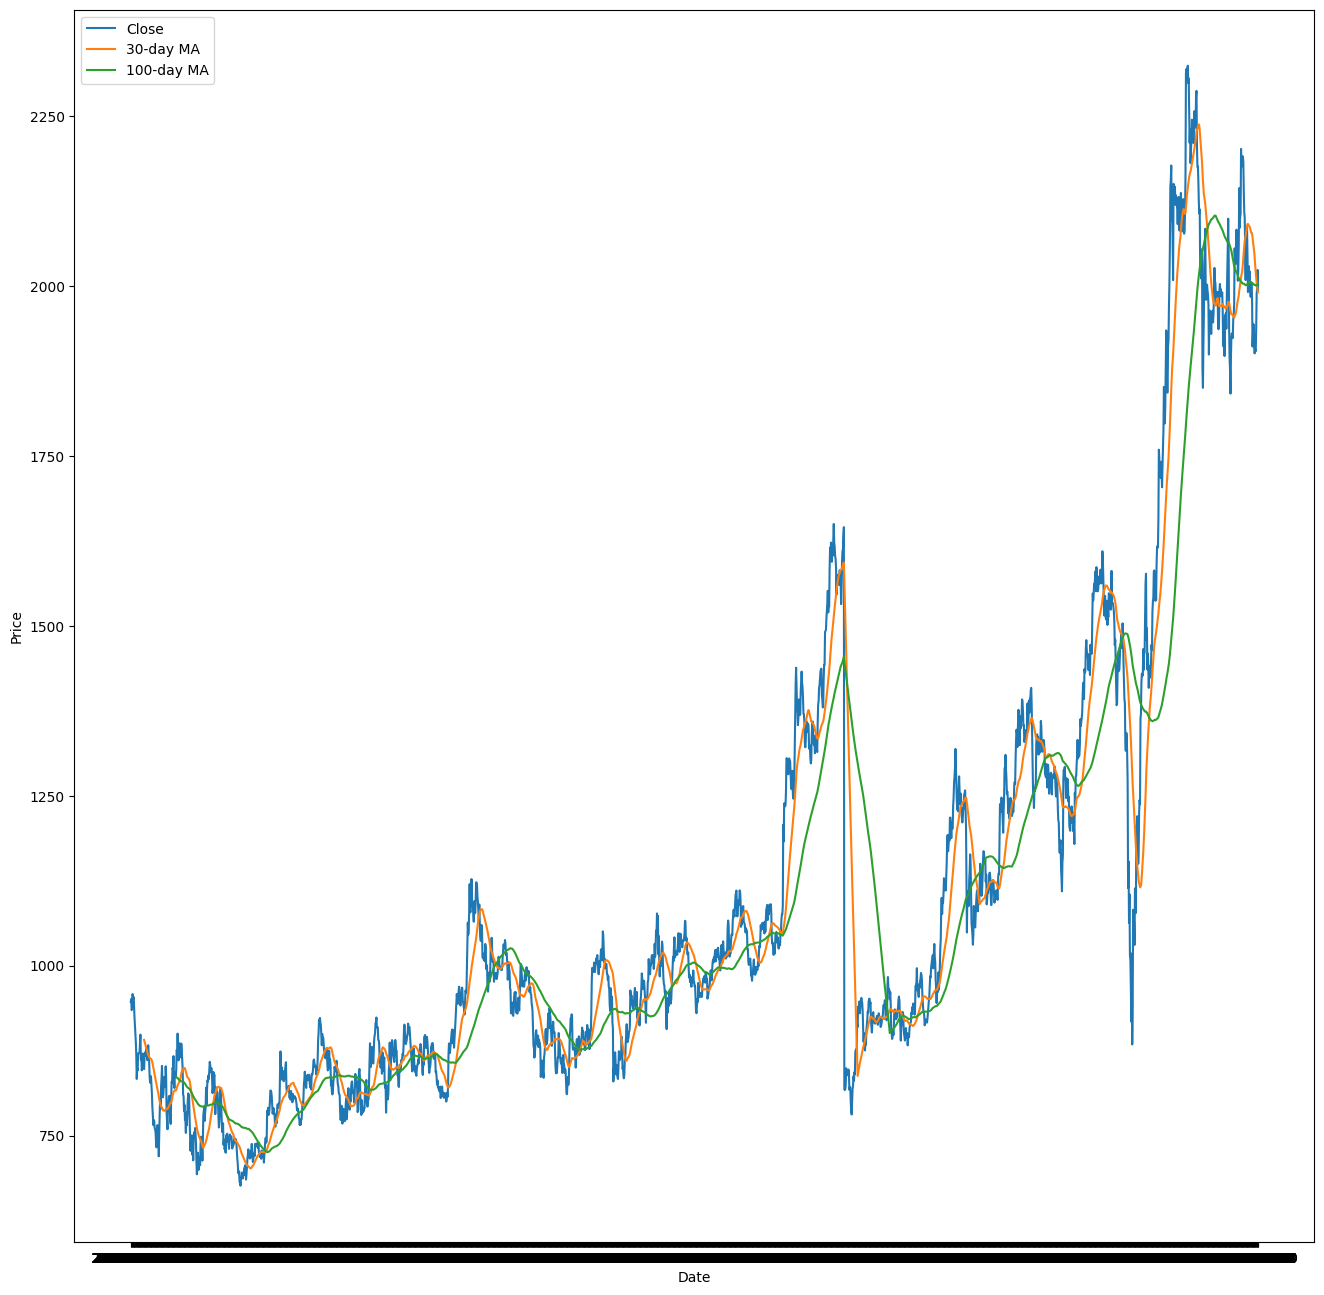

In [ ]:
plt.figure(figsize=(16, 16))
plt.plot(reliance_df.Date, reliance_df.Close, label='Close')
plt.plot(reliance_df.Date, reliance_df.MA30, label='30-day MA')
plt.plot(reliance_df.Date, reliance_df.MA100, label='100-day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Output:

Explanation:

We use line charts to display the moving averages for Reliance shares and multiple-line line charts to display the average daily return for Reliance shares. For Reliance shares, the moving averages are plotted alongside the close prices to show potential buy and sell signals based on historical price movements.

## A competitor analysis for Reliance

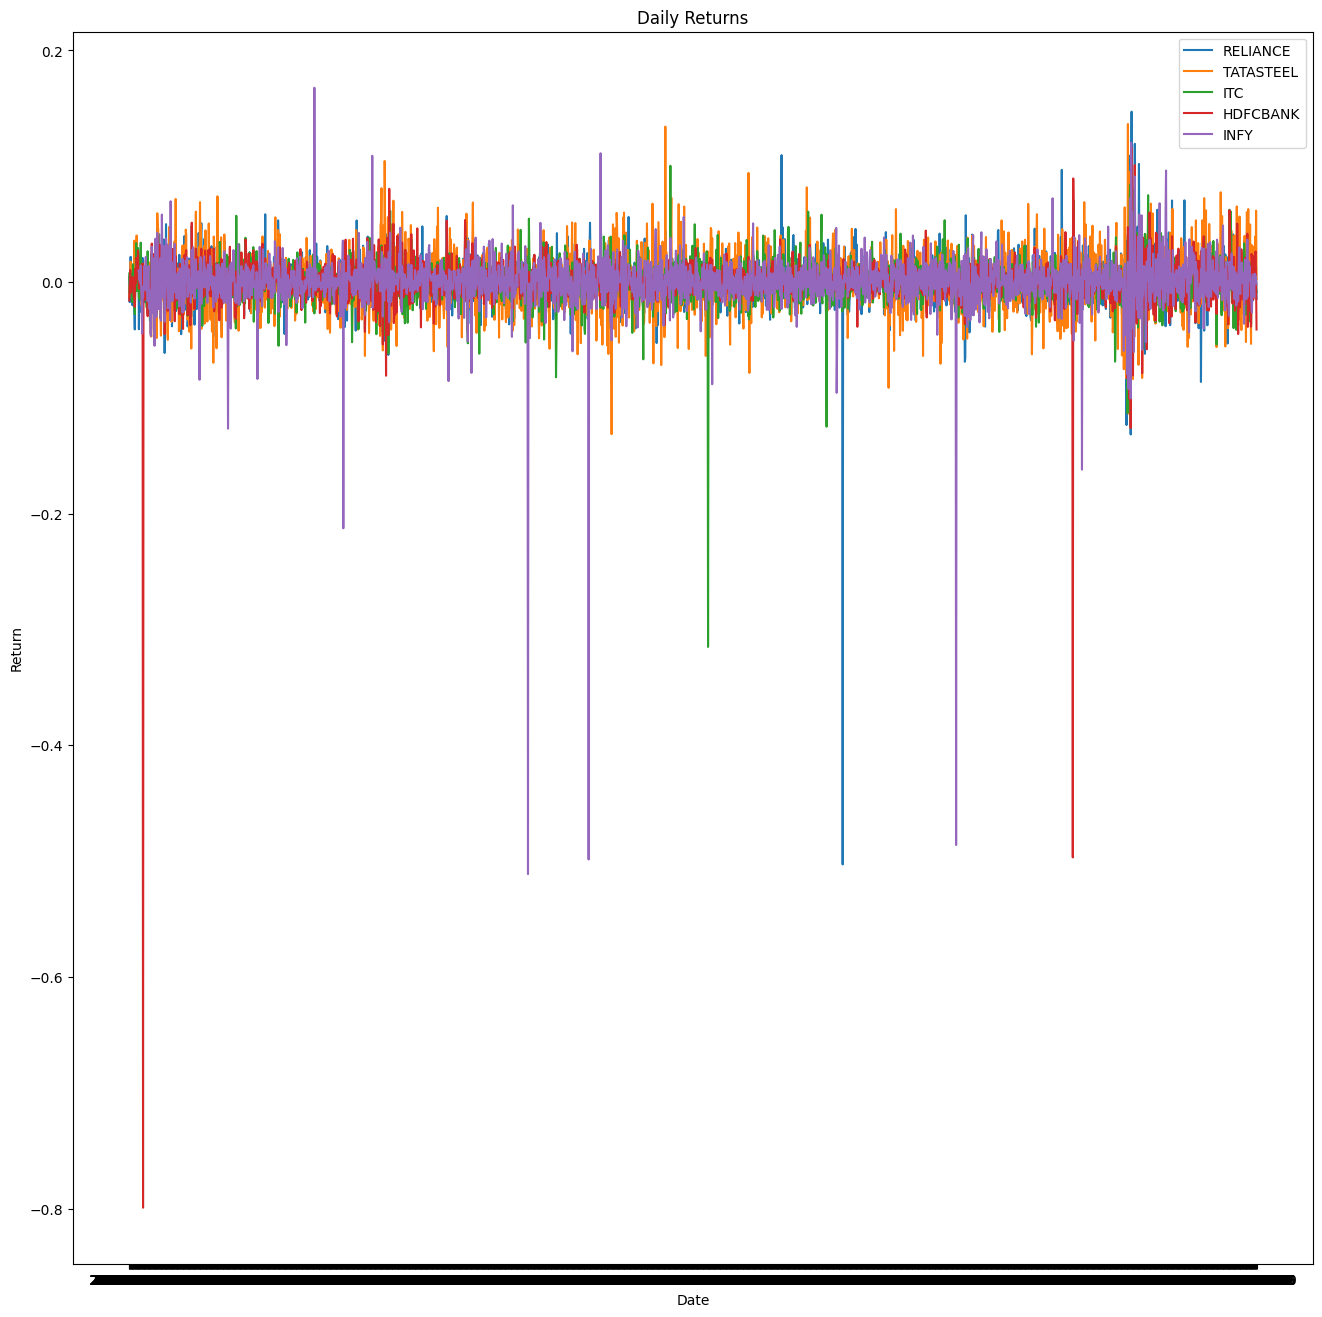

In [ ]:
companies = ['RELIANCE', 'TATASTEEL', 'ITC', 'HDFCBANK', 'INFY']
comp_df = df[df['Symbol'].isin(companies)]

pivot_df = comp_df.pivot(index='Date', columns='Symbol', values='Close')

returns_df = pivot_df.pct_change()

plt.figure(figsize=(16, 16))
for company in companies:
    plt.plot(returns_df[company], label=company)
plt.legend()
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()

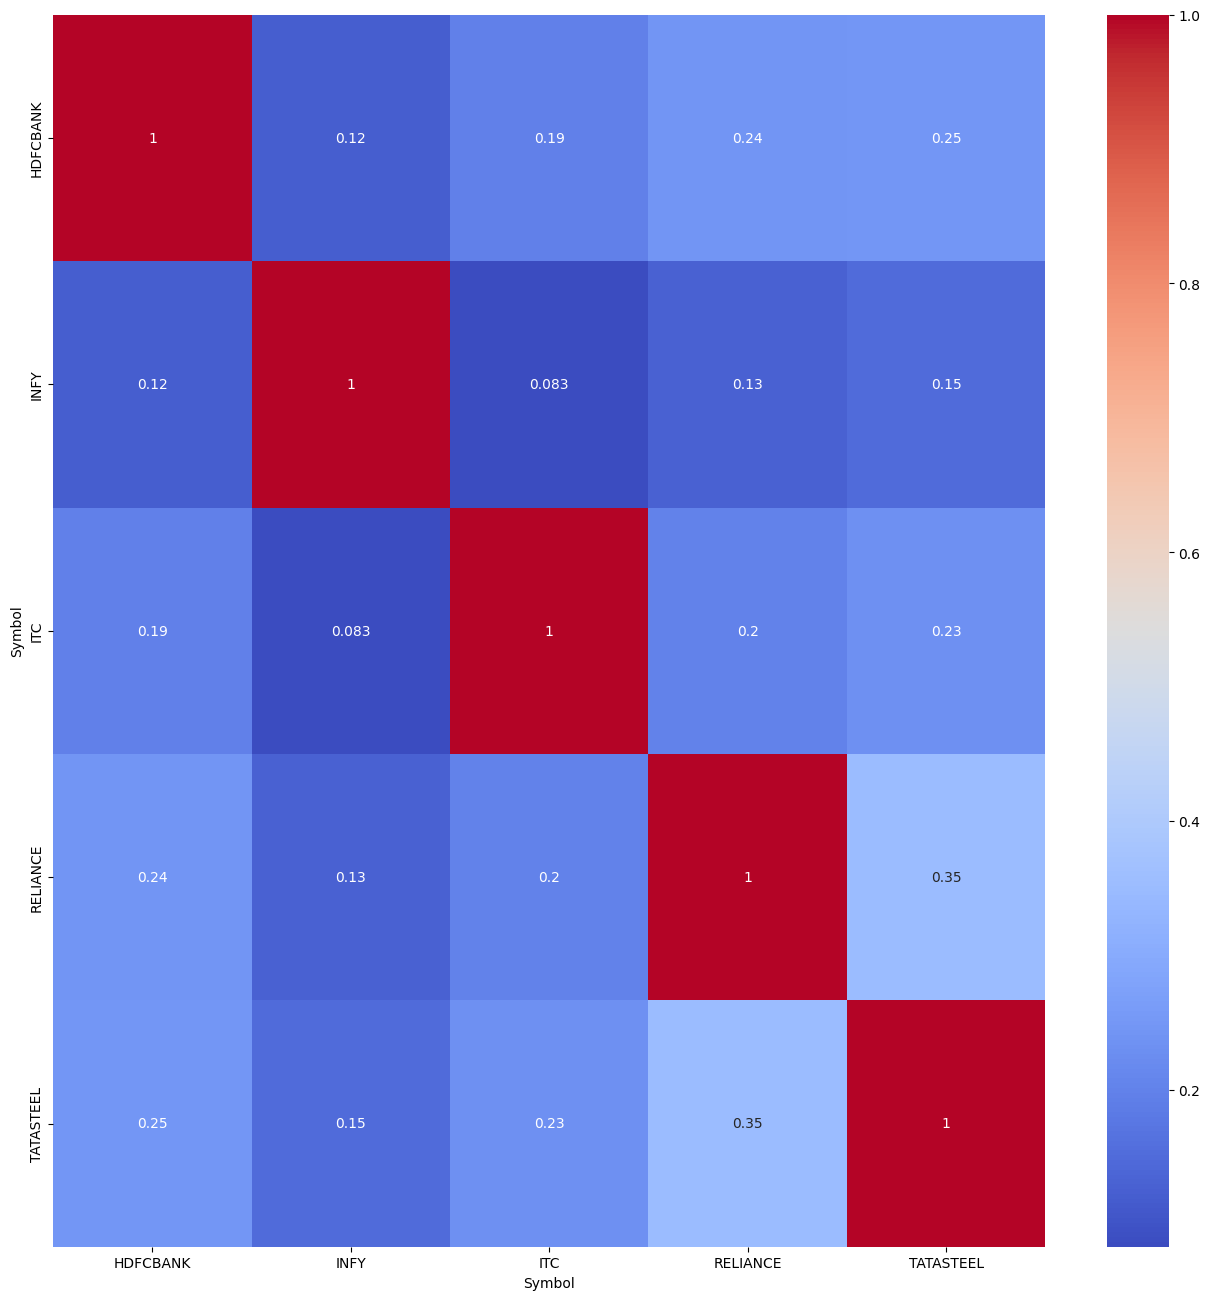

In [ ]:
corr_matrix = returns_df.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Output:

Explanation:


The NIFTY50 dataset is filtered for Reliance shares and its rivals (HDFCBANK, INFY, ITC, TATASTEEL), and then the data is pivotalized to build a table with each company's close prices by date. Daily returns are then calculated, and each company's daily returns are then plotted. To see the connections between the companies' daily results, it also computes a correlation matrix and generates a correlation heatmap. Based on the rivals of Reliance, this study might assist identify potential threats or opportunities in the market.

**SUMMARY:-**The NIFTY50, or the top 50 businesses listed on the National Stock Exchange of India, is the financial dataset for the stock market that the code is analysing. The code loads the dataset using Pandas, looks for duplicates and missing values, and if necessary, removes them. Following that, it calculates summary statistics, displays a heatmap of the dataset's correlations, as well as a distribution and line chart of the closing prices over time.

The programme then searches the dataset for shares of Reliance before calculating daily returns and moving averages and plotting the results. After filtering the data for Reliance Shares and its rivals, the programme computes daily returns, plots the daily returns for each firm, computes the correlation matrix, and displays the correlation heatmap.

**Learning from the analysis:-**

1.   By analysis of Reliance's share Close price over time we can conclude that holding the stock for the long term will give more return on investment.

2.   By analysis of the heatmap we can conclude that the price of Reliance stock is dependent on the overall market trend if the market is in the bull run we can open long positions and if the market is in the bearish term we can look for shorting opportunities.

3.   By analysis of Moving averages we conclude that they serve as indicators of price support or resistance by smoothing out price data for Reliance stocks.

4.   By knowing about a competitor in the market we can track their price also and look for good entry and exit points in that stock also by using risk management and portfolio management by using a good risk-to-reward ratio.